In the week7 course, we used one of the most interesting data sets and that is the MNIST
handwritten data set. You can find the data set following the notebook or you can directly
get it from here. Also, you do not have to use the whole dataset if there is a computation
limit.
The task here is to classify the digits into their own category.


#### Find all the 9s!


In this section you should build up a classifier that can distinguish number 9 from every other
numbers. (reusing code and libraries are ok as long as you explain what is going on)
For each section below you need to measure your performance. So, make sure to run the
performance check at every part.

## Import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

In [5]:
X, y = mnist["data"], mnist["target"]

In [58]:
X.shape

(70000, 784)

### Splitting the Dataset

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X[:60000],y[:60000], test_size=0.20)

In [9]:
shuffle_index = np.random.permutation(48000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

__1. Find the 9s using K-Nearest neighbours for Minkowski metric of order (1, 2, 3).__


In [10]:
y_train_9 = (y_train == 9)
y_test_9 = (y_test == 9)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 1, n_jobs=-1)
classifier.fit(X_train, y_train_9)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=1,
           weights='uniform')

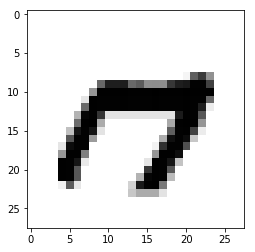

In [13]:
example = X[45000]
example_image = example.reshape(28,28)
import matplotlib as mpl
plt.imshow(example_image, cmap=mpl.cm.binary)

In [15]:
classifier.predict([example])

array([False])

In [16]:
y_prediction = classifier.predict(X_test)
accuracy_score(y_test_9, y_prediction)

0.9890833333333333

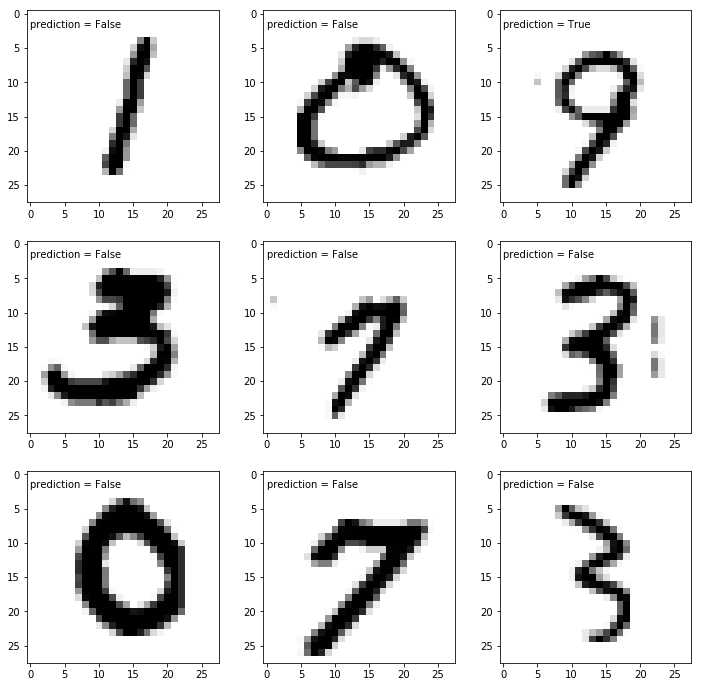

In [17]:
import matplotlib as mpl
plt.figure(figsize=(12, 12))

j = 331
for i in range(0,9):
    example = X_test[i].reshape(28, 28)
    plt.subplot(j); plt.imshow(example, cmap=mpl.cm.binary)
    plt.text(0, 2, "prediction = {}".format(y_prediction[i]))
    j+=1

plt.show()

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2, n_jobs=-1)
classifier.fit(X_train, y_train_9)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='uniform')

In [19]:
y_prediction = classifier.predict(X_test)
accuracy_score(y_test_9, y_prediction)

0.9915

In [20]:
from sklearn.neighbors import KNeighborsClassifier
classifier_3 = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 3,n_jobs=-1)
classifier_3.fit(X_train, y_train_9)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=3,
           weights='uniform')

In [21]:
y_prediction_3 = classifier_3.predict(X_test)
accuracy_score(y_test_9, y_prediction_3)

0.992

__2. Find the 9s using Decision Tree.__

In [27]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy' )
classifier.fit(X_train, y_train_9)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
y_prediction_tree = classifier.predict(X_test)

In [30]:
accuracy_score(y_test_9, y_prediction_tree)

0.9666666666666667

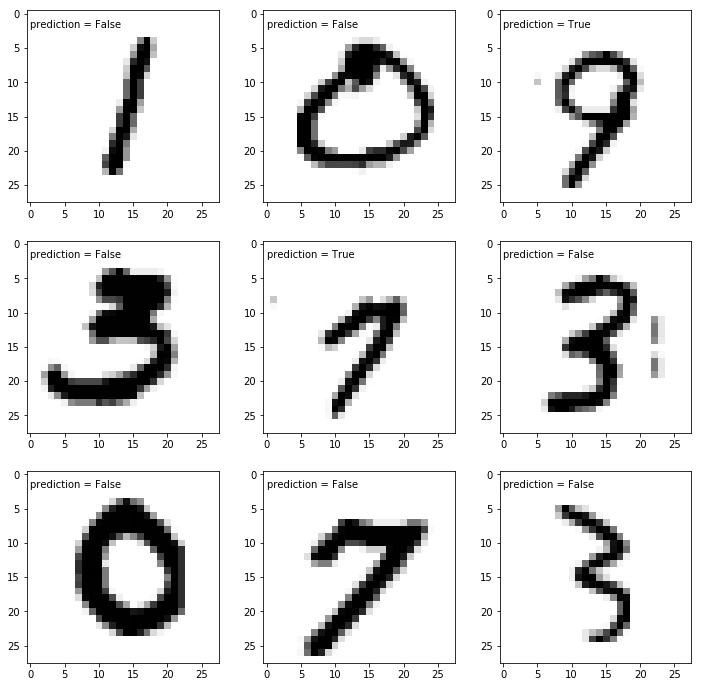

In [31]:
import matplotlib as mpl
plt.figure(figsize=(12, 12))

j = 331
for i in range(0,9):
    example = X_test[i].reshape(28, 28)
    plt.subplot(j); plt.imshow(example, cmap=mpl.cm.binary)
    plt.text(0, 2, "prediction = {}".format(y_prediction_tree[i]))
    j+=1

plt.show()

__3. Find the 9s using Random Forest__

In [33]:
from sklearn.ensemble import RandomForestClassifier
fclassifier = RandomForestClassifier()
fclassifier.fit(X_train, y_train_9)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
y_prediction_forest = fclassifier.predict(X_test)

In [35]:
accuracy_score(y_test_9, y_prediction_forest)

0.9775

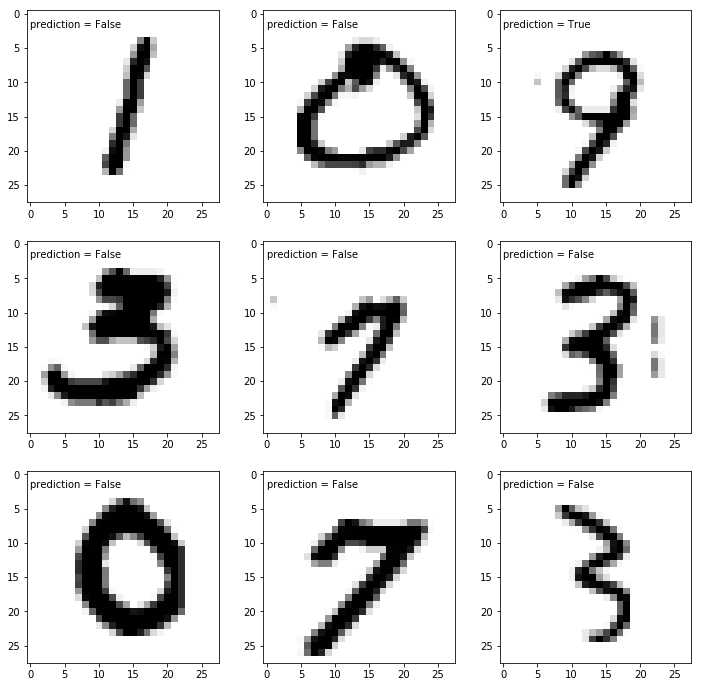

In [36]:
import matplotlib as mpl
plt.figure(figsize=(12, 12))

j = 331
for i in range(0,9):
    example = X_test[i].reshape(28, 28)
    plt.subplot(j); plt.imshow(example, cmap=mpl.cm.binary)
    plt.text(0, 2, "prediction = {}".format(y_prediction_forest[i]))
    j+=1

plt.show()

## Find every single digits!

__1. First forget about the labels and run the k-means algorithm to and determine whether there is an
underlying patterns. So, rst nd the k clusters (here is obviously 10 clusters). Then
look at their labels and nd the accuracy. By doing this you are turning a supervised
learning into an unsupervised learning!__

In [59]:
from sklearn import cluster
clus = cluster.KMeans(init = 'k-means++', n_clusters=10)
clus.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [75]:
y_pred_clus=clus.predict(X_test)
print(accuracy_score(y_test, y_pred_clus))

print(y_pred_clus[:1000])
print(y_test[:1000])

0.07266666666666667
[5 1 6 8 6 4 1 6 5 0 6 3 8 8 8 0 8 7 0 6 6 2 6 3 5 2 6 7 2 3 8 4 8 3 9 3 5
 0 3 6 8 1 1 6 3 7 2 2 5 6 1 7 6 8 9 3 3 9 2 6 3 0 2 2 2 4 2 3 1 9 8 4 7 2
 7 8 5 8 0 8 8 7 7 5 7 2 2 4 8 3 2 8 8 7 9 1 6 5 8 5 5 7 9 6 1 6 8 7 1 2 2
 3 2 7 2 6 1 4 9 0 2 7 2 0 2 4 3 4 4 0 8 3 1 0 9 5 2 7 6 6 6 3 9 2 6 6 6 4
 8 8 0 7 7 7 7 9 0 9 9 5 4 9 4 6 3 3 4 3 5 0 1 0 9 6 1 1 4 3 5 5 8 5 8 5 6
 9 8 0 4 1 6 7 3 1 8 3 1 3 0 8 6 7 7 9 0 1 3 7 3 9 6 1 2 0 4 1 6 8 9 7 0 8
 6 8 3 8 3 4 0 6 1 4 8 7 6 2 6 0 8 5 6 8 4 7 0 0 1 2 8 3 1 8 9 2 7 1 5 1 1
 5 8 3 4 1 1 8 3 0 4 0 8 7 2 0 1 1 8 2 2 8 1 1 8 4 8 8 4 3 5 4 5 6 5 5 4 2
 6 8 5 2 6 6 7 3 6 5 4 4 5 3 1 2 5 0 4 4 5 2 3 4 9 6 1 2 3 2 6 6 6 0 7 3 8
 7 3 8 1 3 4 7 8 9 0 9 0 3 8 6 4 4 8 0 2 8 0 2 7 6 9 4 4 7 6 4 1 4 9 5 5 1
 6 9 4 5 0 5 3 4 4 2 0 4 6 4 6 1 0 9 2 4 6 5 7 6 2 0 8 8 5 0 1 5 9 3 7 4 7
 6 7 4 5 2 3 5 3 4 6 6 7 4 1 1 7 8 4 8 9 9 6 3 9 1 2 4 0 9 2 9 1 7 7 4 1 9
 2 3 4 8 2 4 1 1 4 8 4 7 6 5 8 5 8 4 9 8 5 8 4 0 7 5 4 6 0 4 0 0 5 1 6 4 2
 8 0 

Running the cluster, we achieve 7 percent accuracy which is very low. There are many features for clustering to make a accurate prediction. We can consider PCA to reduce the dimensionality for better results. 

__2. Find the digits using K-Nearest neighbours for Minkowski metric of order (1, 2, 3).__

In [74]:
#Using a smaller dataset for resource efficency
X_train, X_test, y_train, y_test = train_test_split(X[:30000],y[:30000], test_size=0.20)

In [75]:
shuffle_index = np.random.permutation(24000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [76]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 1, n_jobs=-1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=1,
           weights='uniform')

In [77]:
y_prediction = classifier.predict(X_test)
accuracy_score(y_test, y_prediction)

0.9845

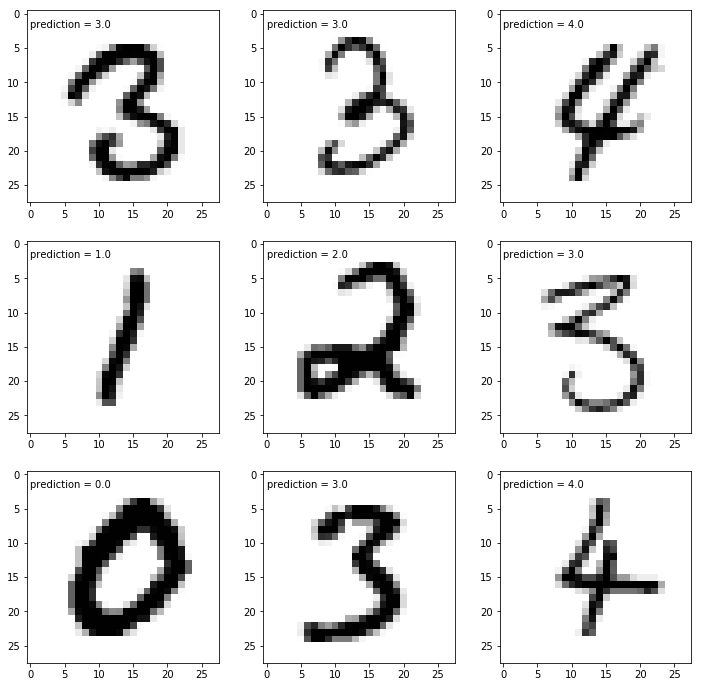

In [78]:
import matplotlib as mpl
plt.figure(figsize=(12, 12))

j = 331
for i in range(0,9):
    example = X_test[i].reshape(28, 28)
    plt.subplot(j); plt.imshow(example, cmap=mpl.cm.binary)
    plt.text(0, 2, "prediction = {}".format(y_prediction[i]))
    j+=1

plt.show()

In [84]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2, n_jobs=-1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='uniform')

In [85]:
y_prediction = classifier.predict(X_test)
accuracy_score(y_test, y_prediction)

0.9876666666666667

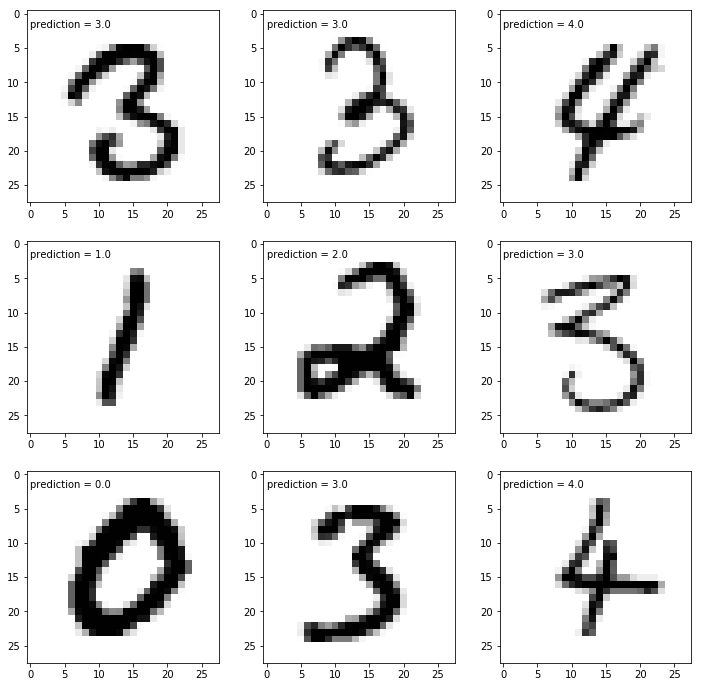

In [86]:
import matplotlib as mpl
plt.figure(figsize=(12, 12))

j = 331
for i in range(0,9):
    example = X_test[i].reshape(28, 28)
    plt.subplot(j); plt.imshow(example, cmap=mpl.cm.binary)
    plt.text(0, 2, "prediction = {}".format(y_prediction[i]))
    j+=1

plt.show()

In [94]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 3, n_jobs=-1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=3,
           weights='uniform')

In [95]:
y_prediction = classifier.predict(X_test)
accuracy_score(y_test, y_prediction)

0.9893333333333333

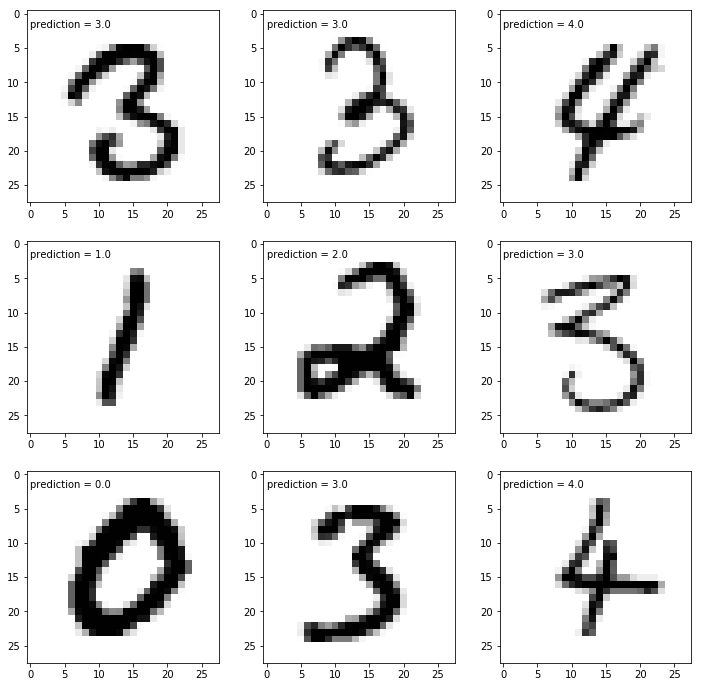

In [96]:
plt.figure(figsize=(12, 12))

j = 331
for i in range(0,9):
    example = X_test[i].reshape(28, 28)
    plt.subplot(j); plt.imshow(example, cmap=mpl.cm.binary)
    plt.text(0, 2, "prediction = {}".format(y_prediction[i]))
    j+=1

plt.show()

__2. Find the digits using Decision Tree.__

In [87]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy' )
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [88]:
y_prediction_tree = classifier.predict(X_test)
accuracy_score(y_test, y_prediction_tree)

0.9441666666666667

__3. Find the digits using Random Forest.__

In [89]:
from sklearn.ensemble import RandomForestClassifier
fullclassifier = RandomForestClassifier()
fullclassifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [90]:
y_prediction_forest = fullclassifier.predict(X_test)

In [92]:
accuracy_score(y_test, y_prediction_forest)

0.9773333333333334

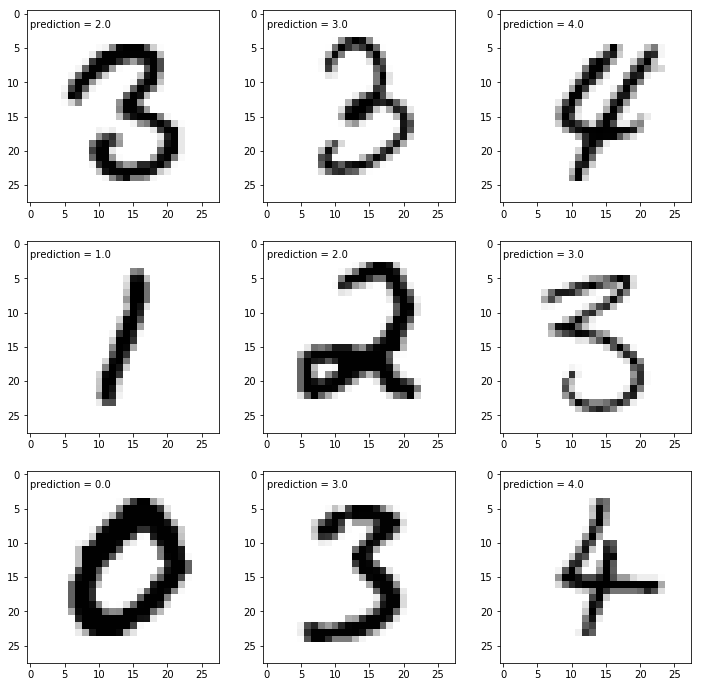

In [93]:
import matplotlib as mpl
plt.figure(figsize=(12, 12))

j = 331
for i in range(0,9):
    example = X_test[i].reshape(28, 28)
    plt.subplot(j); plt.imshow(example, cmap=mpl.cm.binary)
    plt.text(0, 2, "prediction = {}".format(y_prediction_forest[i]))
    j+=1

plt.show()

 __4.Comment on any signicant dierence between your results for the binary classier
vs multi-class classiers.__

In Binary Classifer, the accuracy score was higher. However, this is expected because the model is simply predicting between a yes and no.  For the multiclass, it needs to classify the actual numbers.  Although, I used accuracy score there are better evaulators of these classifors such as using cross validation, confusion matrix, or F1 score. 